Integrantes do grupo:

**Pedro de Paula Gonçalves - 2023003517**\
**Pedro Nogueira Barboza - 2023006500**


<div style="text-align: center;">
<h1>XMAC02 – Trabalho 01</h1>

<h2>Definição, Coleta, Organização, Visualização e Análise de Dados </h2>
</div>

## Importação das Bibliotecas

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Leitura dos Datasets

In [232]:
# "geolocation_zip_code_prefix","geolocation_lat","geolocation_lng","geolocation_city","geolocation_state"
df_dados_geograficos = pd.read_csv('olist_geolocation_dataset.csv') # esse dataset contém informações de localização onde os pedidos foram realizados

# "product_id","product_category_name","product_name_lenght","product_description_lenght","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"
df_dados_dos_produtos = pd.read_csv('olist_products_dataset.csv') # esse dataset contém dados do id do produto, categoria do produto, tamanho do nome do produto, tamanho da descrição do produto, quantidade de fotos do produto, peso do produto, comprimento do produto, altura do produto e largura do produto

# "order_id","customer_id","order_status","order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"
df_dados_dos_pedidos = pd.read_csv('olist_orders_dataset.csv') # esse dataset contém informações dos pedidos, como id do pedido, id do cliente, status do pedido, data de compra, data de aprovação, data de envio, data de entrega e data estimada de entrega

# "order_id","order_item_id","product_id","seller_id","shipping_limit_date","price","freight_value"
df_dados_dos_itens_do_pedido = pd.read_csv('olist_order_items_dataset.csv') # esse dataset contém dados do id do pedido, id do item do pedido, id do produto, id do vendedor, data limite de envio, preço e valor do frete

# "customer_id","customer_unique_id","customer_zip_code_prefix","customer_city","customer_state"
df_dado_dos_clientes = pd.read_csv('olist_customers_dataset.csv') 

# "review_id","order_id","review_score","review_comment_title","review_comment_message","review_creation_date","review_answer_timestamp"
df_avaliacoes =  pd.read_csv('olist_order_reviews_dataset.csv')

# "order_id","payment_sequential","payment_type","payment_installments","payment_value"
df_metodos_de_pagamento = pd.read_csv('olist_order_payments_dataset.csv')


## Limpeza e transformação dos dados

In [233]:
# Remover valores nulos em 'review_score', se houver
df_avaliacoes = df_avaliacoes.dropna(subset=['review_score'])

# Remover as linhas com valores nulos na coluna 'order_delivered_customer_date'
df_dados_dos_pedidos.dropna(subset=['order_delivered_customer_date'], inplace=True)

# Remover registros inválidos
df_dados_dos_pedidos = df_dados_dos_pedidos.dropna(subset=['order_delivered_customer_date', 'order_purchase_timestamp'])

# Remover as linhas onde 'payment_type' é 'not_defined'
df_metodos_de_pagamento = df_metodos_de_pagamento[df_metodos_de_pagamento['payment_type'] != 'not_defined']

# Converter colunas de data para datetime
df_dados_dos_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_dados_dos_pedidos['order_purchase_timestamp'])
df_dados_dos_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_dados_dos_pedidos['order_delivered_customer_date'])

# Calcular o tempo de entrega em dias
df_dados_dos_pedidos['delivery_time'] = (df_dados_dos_pedidos['order_delivered_customer_date'] - df_dados_dos_pedidos['order_purchase_timestamp']).dt.days

## Fazendo Merge dos datasets

In [234]:
df_todos_pedidos = pd.merge(df_dados_dos_pedidos, df_dados_dos_itens_do_pedido)

df_pedidos_e_produtos = pd.merge(df_todos_pedidos, df_dados_dos_produtos, on="product_id")

df_dados_cliente_pedidos = pd.merge(df_todos_pedidos, df_dado_dos_clientes, on='customer_id')

df_dados_itens_df_pedidos_produtos = pd.merge(df_dados_dos_itens_do_pedido, df_dados_dos_produtos, on='product_id')

df_pedidos_produtos = pd.merge(df_dados_itens_df_pedidos_produtos, df_dados_cliente_pedidos, on='order_id')

df_pedidos_df_avaliacoes = pd.merge(df_dados_dos_pedidos, df_avaliacoes[['order_id', 'review_score']], on='order_id')

df_pedidos_avaliacoes = pd.merge(df_pedidos_e_produtos, df_avaliacoes[['order_id', 'review_score']], on='order_id')




## Top 10 Categorias por Avaliação Média

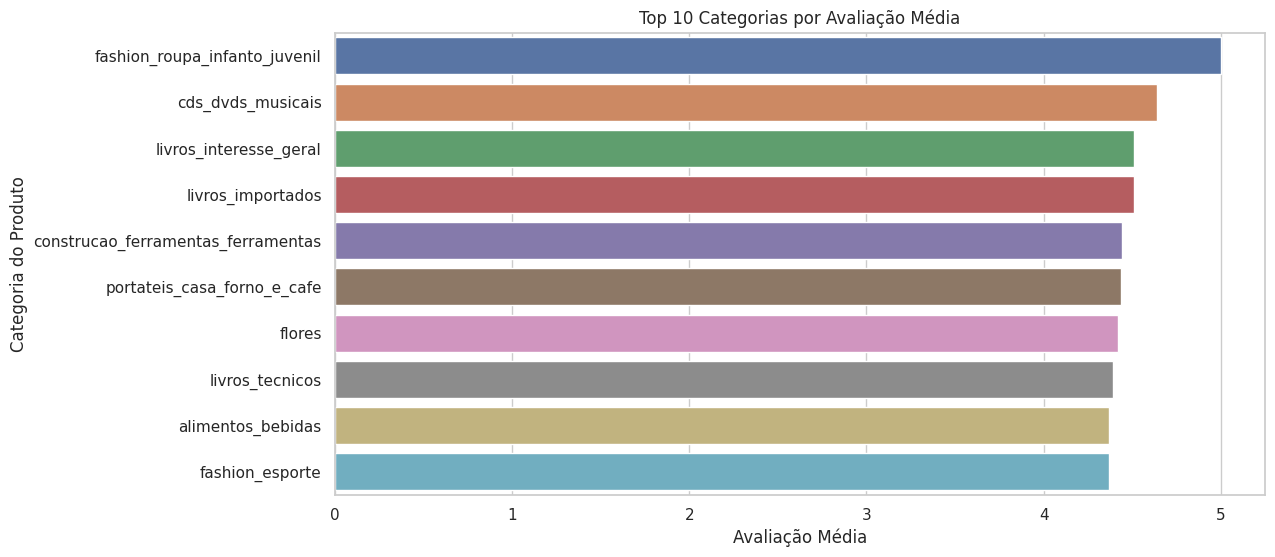

In [235]:
avaliacao_por_categoria = df_pedidos_avaliacoes.groupby('product_category_name')['review_score'].mean().reset_index()
avaliacao_por_categoria = avaliacao_por_categoria.sort_values(by='review_score', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='review_score', y='product_category_name', data=avaliacao_por_categoria.head(10),  hue='product_category_name')
plt.title('Top 10 Categorias por Avaliação Média')
plt.xlabel('Avaliação Média')
plt.ylabel('Categoria do Produto')

plt.show()


## Frete Por Estado

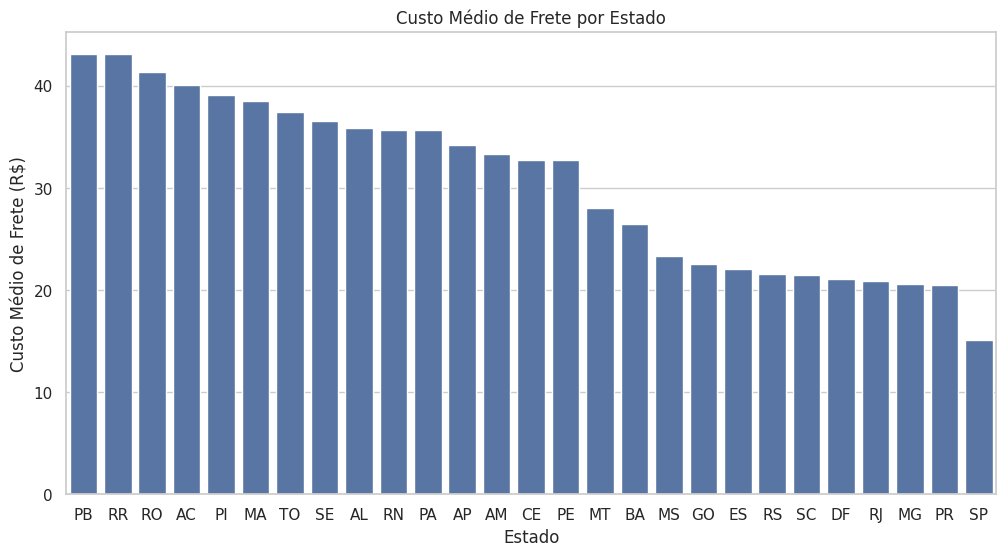

In [236]:
df_frete_por_estado = df_dados_cliente_pedidos.groupby('customer_state')['freight_value'].mean().reset_index()
df_frete_por_estado = df_frete_por_estado.sort_values(by='freight_value', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='customer_state', y='freight_value', data=df_frete_por_estado)
plt.title('Custo Médio de Frete por Estado')
plt.xlabel('Estado')
plt.ylabel('Custo Médio de Frete (R$)')
plt.show()

## Top 10 Estados no Brasil que mais realizam compras online (2016-2018)

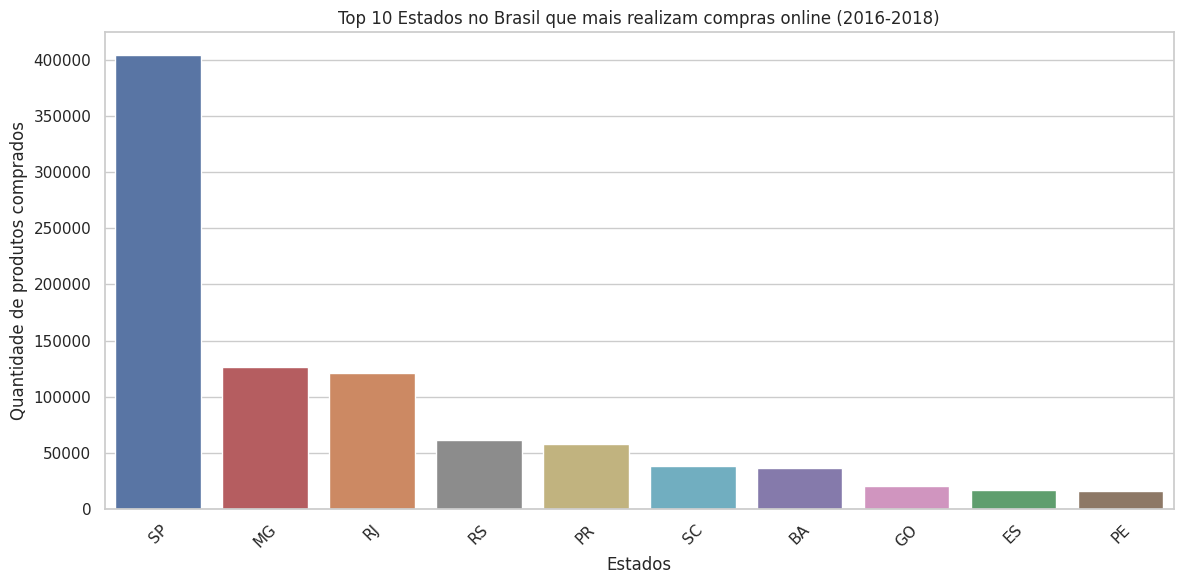

In [237]:
top_10_estados = df_dados_geograficos['geolocation_state'].value_counts().nlargest(10).index
dados_top_10_estados = df_dados_geograficos[df_dados_geograficos['geolocation_state'].isin(top_10_estados)]
plt.figure(figsize=(12,6))
sns.countplot(x='geolocation_state', data=dados_top_10_estados, 
              order=dados_top_10_estados['geolocation_state'].value_counts().index, 
              hue='geolocation_state', 
              dodge=False,
              legend=False)
plt.title('Top 10 Estados no Brasil que mais realizam compras online (2016-2018)')
plt.xlabel('Estados')
plt.ylabel('Quantidade de produtos comprados')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False) 
plt.tight_layout()
plt.show()


## Os 10 Produtos mais vendidos

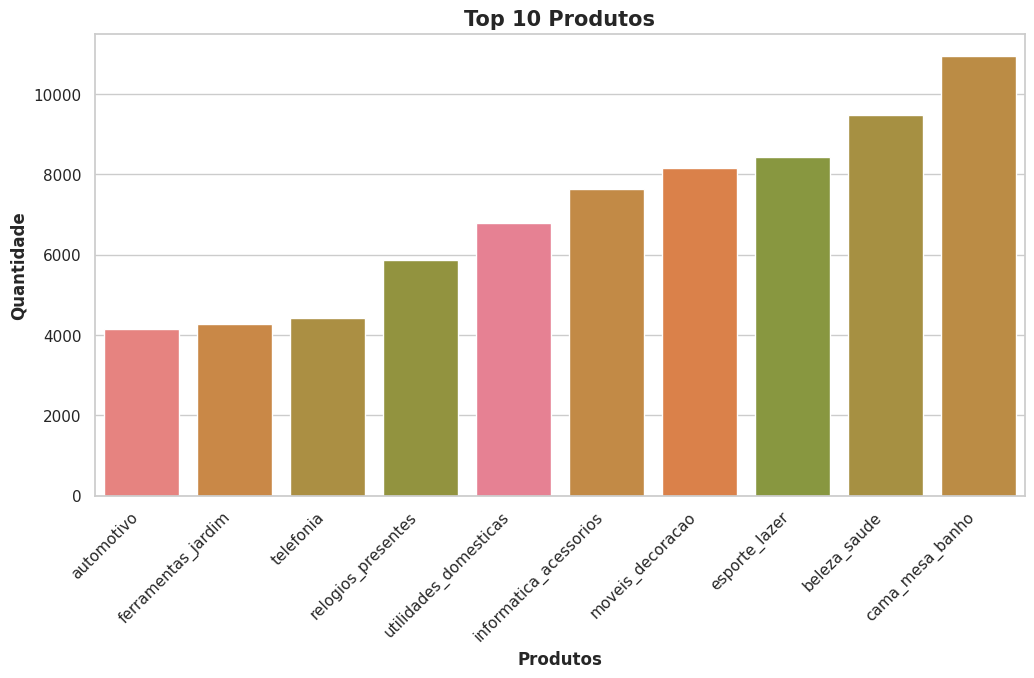

In [238]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='product_category_name', data=df_pedidos_e_produtos,hue='product_category_name',
                   order=df_pedidos_e_produtos['product_category_name'].value_counts()[:10].sort_values().index)
ax.set_title("Top 10 Produtos", fontsize=15, weight='bold')
ax.set_xlabel('Produtos', fontsize=12, weight='bold')
ax.set_ylabel('Quantidade', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend([],[], frameon=False)  
plt.show()


## Distribuição dos meios de pagamento

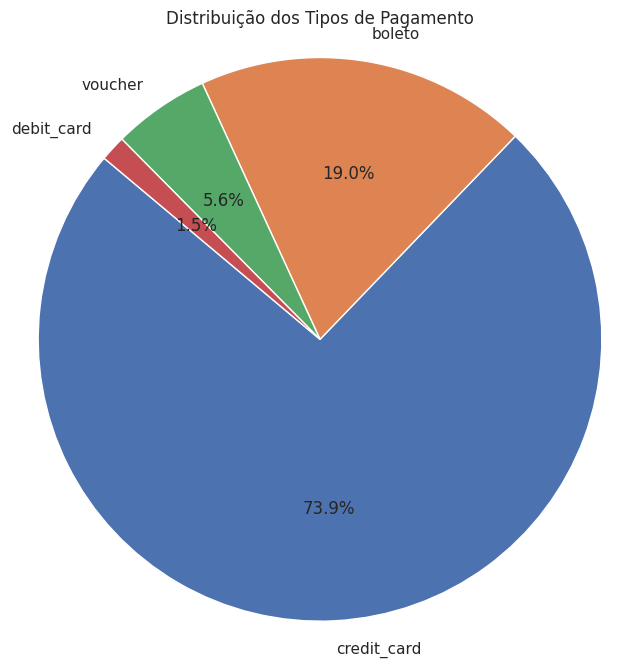

In [239]:
contagem_pagamentos = df_metodos_de_pagamento['payment_type'].value_counts()
labels = contagem_pagamentos.index
sizes = contagem_pagamentos.values
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels,  autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Tipos de Pagamento')
plt.axis('equal')  
plt.show()


### Os 5 produtos mais comprados nos estados de SP, MG, RJ (onde se concentram maior parte das vendas)

In [240]:
def plot_top_produtos_grafico_de_pizza(df, codigo_estado, top_n=5):
    df_state = df[df['customer_state'] == codigo_estado]
    contagem_produtos = df_state['product_category_name'].value_counts()
    top_produtos = contagem_produtos.nlargest(top_n)
    top_produtos_porcentagem = 100 * top_produtos / top_produtos.sum()
    plt.figure(figsize=(8,8))
    plt.pie(top_produtos_porcentagem, labels=top_produtos.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top {top_n} Produtos Mais Comprados em {codigo_estado}')
    plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo
    plt.show()

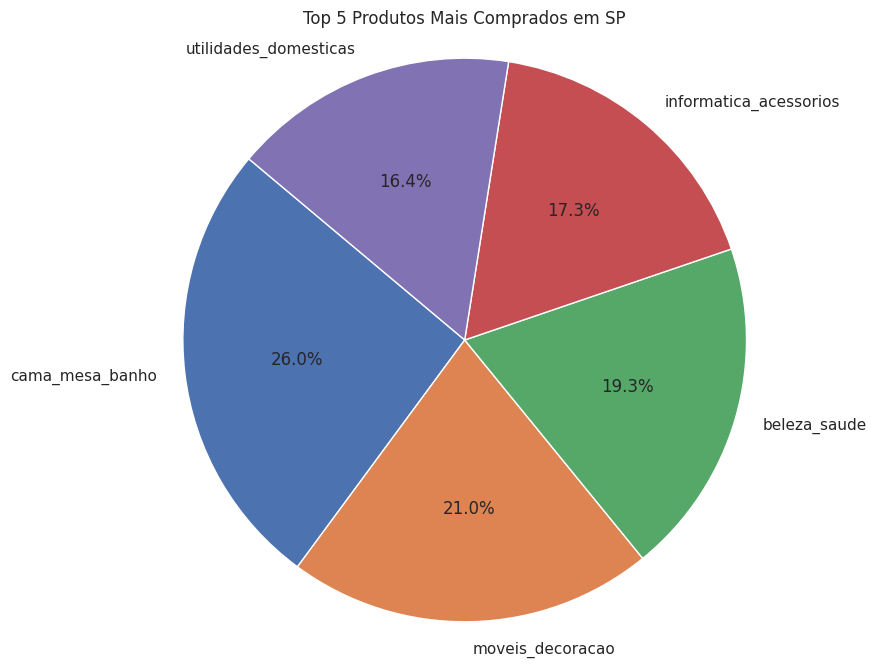

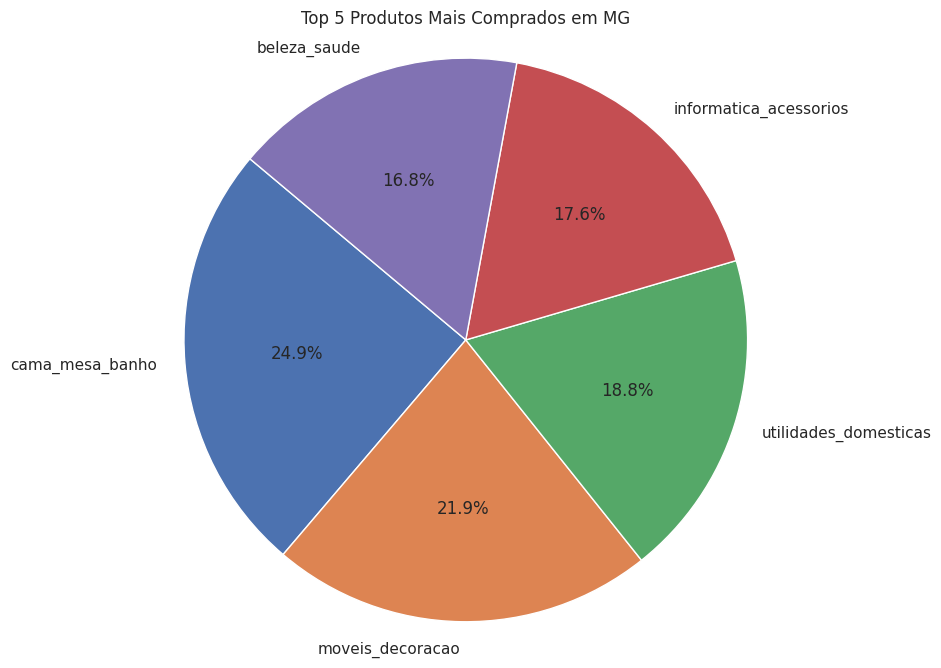

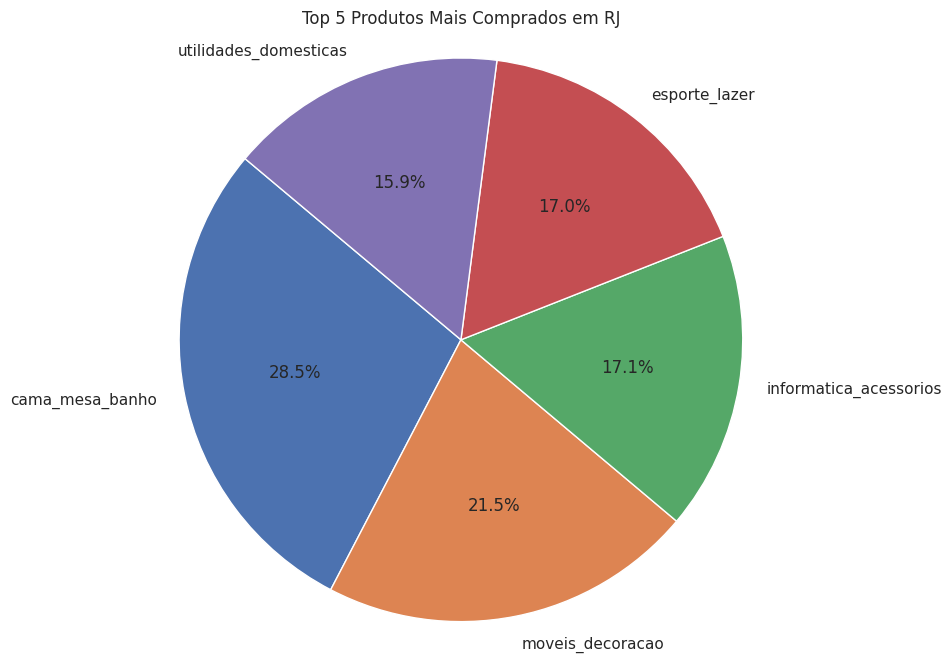

In [241]:
plot_top_produtos_grafico_de_pizza(df_pedidos_produtos, 'SP')

plot_top_produtos_grafico_de_pizza(df_pedidos_produtos, 'MG')

plot_top_produtos_grafico_de_pizza(df_pedidos_produtos, 'RJ')

## Número de compras por Ano

   year  num_purchases
2  2016            370
1  2017          49765
0  2018          62511
3  2020              4


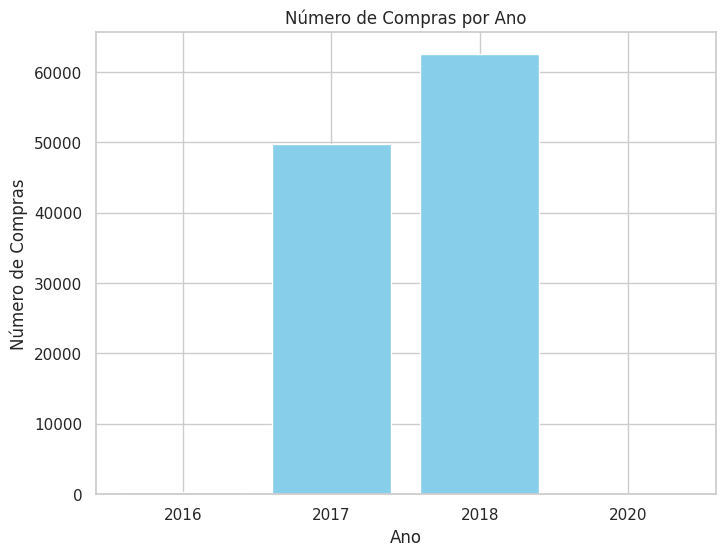

In [242]:
df_dados_dos_itens_do_pedido['shipping_limit_date'] = pd.to_datetime(df_dados_dos_itens_do_pedido['shipping_limit_date'])

df_dados_dos_itens_do_pedido['year'] = df_dados_dos_itens_do_pedido['shipping_limit_date'].dt.year

compras_por_ano = df_dados_dos_itens_do_pedido['year'].value_counts().reset_index()
compras_por_ano.columns = ['year', 'num_purchases']
compras_por_ano = compras_por_ano.sort_values('year')

print(compras_por_ano)

plt.figure(figsize=(8,6))
plt.bar(compras_por_ano['year'].astype(str), compras_por_ano['num_purchases'], color='skyblue')
plt.title('Número de Compras por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Compras')
plt.show()


## Número de compras por Mês (Agregado)

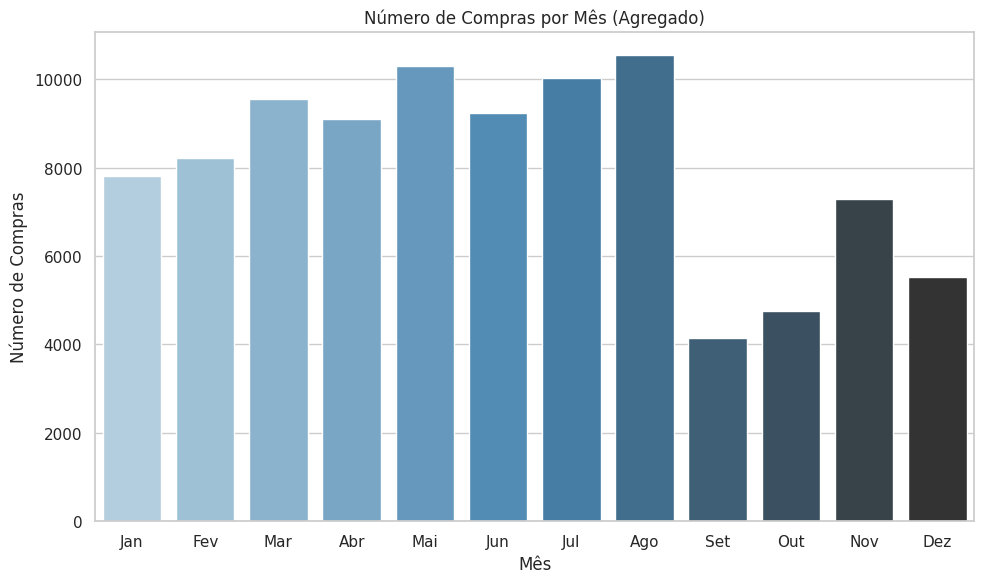

In [243]:

df_dados_dos_pedidos['mes'] = df_dados_dos_pedidos['order_purchase_timestamp'].dt.month

pedidos_por_mes = df_dados_dos_pedidos.groupby('mes').size().reset_index(name='num_pedidos')

pedidos_por_mes = pedidos_por_mes.sort_values('mes')

pedidos_por_mes['mes_index'] = pedidos_por_mes['mes'] - 1

plt.figure(figsize=(10,6))
sns.barplot(data=pedidos_por_mes, x='mes_index', y='num_pedidos', palette='Blues_d', hue='mes')
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.xticks(ticks=range(0,12), labels=meses)
plt.title('Número de Compras por Mês (Agregado)')
plt.xlabel('Mês')
plt.ylabel('Número de Compras')
plt.legend([],[], frameon=False)  
plt.tight_layout()
plt.show()


## Satisfação dos Clientes com as Compras

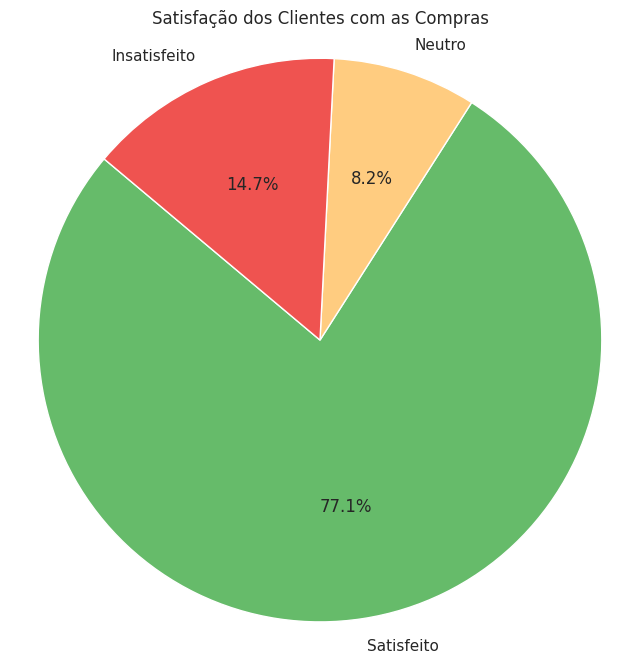

In [244]:


def categorize_satisfaction(score):
    if score >= 4:
        return 'Satisfeito'
    elif score == 3:
        return 'Neutro'
    else:
        return 'Insatisfeito'

df_avaliacoes['satisfaction'] = df_avaliacoes['review_score'].apply(categorize_satisfaction)

contagem_satisfacao = df_avaliacoes['satisfaction'].value_counts().reindex(['Satisfeito', 'Neutro', 'Insatisfeito'])

labels = contagem_satisfacao.index
sizes = contagem_satisfacao.values

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66bb6a', '#ffcc80', '#ef5350'])
plt.title('Satisfação dos Clientes com as Compras')
plt.axis('equal')
plt.show()



## Distribuição das Notas de Avaliação dos Clientes

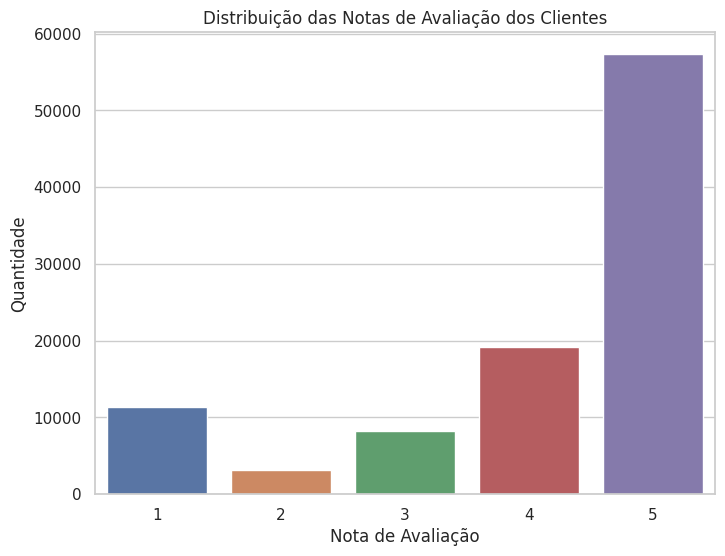

In [245]:
contagem_avaliacao = df_avaliacoes['review_score'].value_counts().sort_index()

labels = contagem_avaliacao.index.astype(str)
sizes = contagem_avaliacao.values

plt.figure(figsize=(8,6))
sns.barplot(x=labels, y=sizes, hue=labels)
plt.title('Distribuição das Notas de Avaliação dos Clientes')
plt.xlabel('Nota de Avaliação')
plt.ylabel('Quantidade')
plt.show()


## Relação entre Tempo de Entrega e Satisfação do Cliente

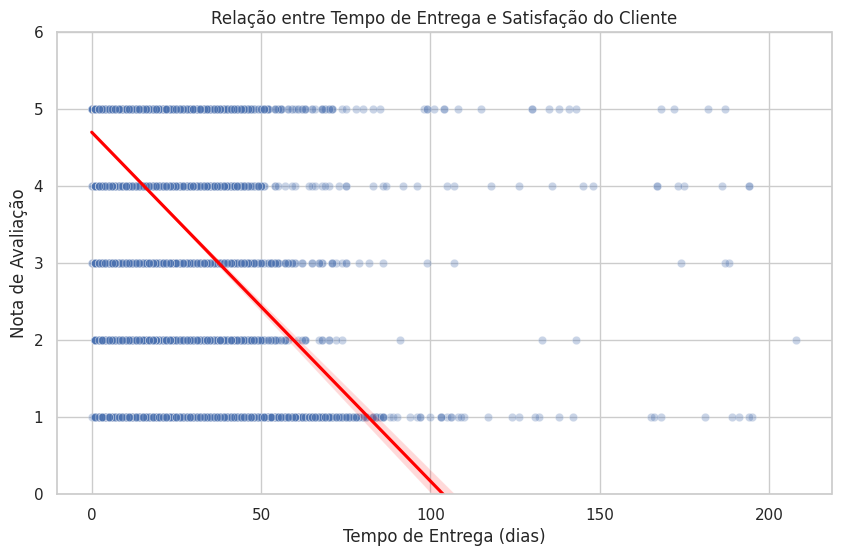

In [246]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='delivery_time', y='review_score', data=df_pedidos_df_avaliacoes, alpha=0.3)
sns.regplot(x='delivery_time', y='review_score', data=df_pedidos_df_avaliacoes, scatter=False, color='red')
plt.title('Relação entre Tempo de Entrega e Satisfação do Cliente')
plt.ylim(0,6)  # Limitar o eixo Y entre 0 e 5, o intervalo esperado para a nota de avaliação
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Nota de Avaliação')
plt.show()
